In [17]:
from numpy import array, arange, linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [18]:
# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

In [35]:
def func(ci, t, m, hbar, E):
    psi = ci[0]
    phi = ci[1]
    vx = 0
    dphi = (2*m/hbar**2)*(vx-E)*psi
    return( array([phi, dphi], float) )

In [73]:
E1 = 0.0
E2 = e

b = L
a = 0
N = 1000
tt = linspace(a, b, N)
p0 = [0.0, 1.0]

out = odeint( func, p0, tt, args=(m, hbar, E1) )
psi2 = out[999,0]

target = e/1e3
while abs(E2-E1)>target:
    psi1 = psi2
    solu =  odeint( func, p0, tt, args=(m, hbar, E2) )
    psi2 = solu[999,0]
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print(E2/e)

134.286386831


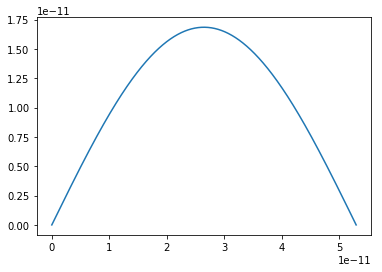

In [23]:
plt.plot(tt,solu[:,0])
plt.show()

In [60]:
def func2(ci, t, m, hbar, E, L, V0):
    psi = ci[0]
    phi = ci[1]
    tmp = t/L
    vx = V0*tmp*(tmp - 1)
    dphi = (2*m/hbar**2)*(vx-E)*psi
    return( array([phi, dphi], float) )

In [61]:
E1 = 0.0
E2 = e
V0 = 100.*e # eV

b = L
a = 0
N = 1000
tt = linspace(a, b, N)
p0 = [0.0, 1.0]

out = odeint( func2, p0, tt, args=(m, hbar, E1, L, V0) )
psi2 = out[999,0]

target = e/1e3
while abs(E2-E1)>target:
    psi1 = psi2
    solu2 =  odeint( func2, p0, tt, args=(m, hbar, E2, L, V0) )
    psi2 = solu2[999,0]
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print(E2/e)

112.540106432


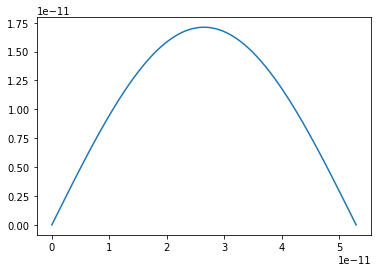

In [62]:
plt.plot(tt,solu1[:,0])
plt.show()

In [55]:
def func3(ci, t, m, hbar, E, L, V0):
    psi = ci[0]
    phi = ci[1]
    vx = (V0*t*t)/L
    dphi = (2*m/hbar**2)*(vx-E)*psi
    return( array([phi, dphi], float) )

In [70]:
E1 = 538*e
E2 = 10000*e
V0 = 100.*e # eV

b = L
a = 0
N = 1000
tt = linspace(a, b, N)
p0 = [0.0, 1.0]

out = odeint( func3, p0, tt, args=(m, hbar, E1, L, V0) )
psi2 = out[999,0]

target = e/1e3
while abs(E2-E1)>target:
    psi1 = psi2
    solu3 =  odeint( func3, p0, tt, args=(m, hbar, E2, L, V0) )
    psi2 = solu3[999,0]
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print(E2/e)

8594.3270492


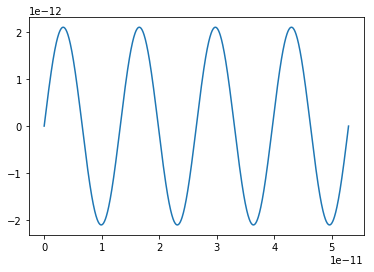

In [71]:
plt.plot(tt,solu3[:,0])
plt.show()